# Домашнє завдання до модуля 4: візуалізація даних.
В цьому ДЗ ми будемо багато працювати не тільки з візуалізаціями, а і з функціоналом pandas, адже візуалізація даних - це частина аналізу даних та працює спільно з агрегацією та фільтрацією наших даних. До того ж перед тим, як аналізувати дані, їх треба почистити. Чим ми і займемось.  

0.Імпортуйте бібліотеки matplotlib.pyplot, seaborn та pandas.

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

## Набір даних Taxis

Використовуючи метод з бібліотеки `seaborn` `load_dataset` ми завантажимо перший набір даних для аналізу. Завантажимо дані так, бо це зручно + аби ви знали, що є і така можливість знайти собі набір даних для експериментів.  
Набір даних містить поїздки таксі у Нью Йорку у 2019 році. Детальний опис на [сайті](https://www.nyc.gov/site/tlc/about/tlc-trip-record-data.page).  

Які колонки мість набір даних:  
- `pickup` - час початку поїздки  
- `dropoff` - час закінчення поїздки  
- `passengers` - кількість пасажирів у поїздці  
- `distance` - відстань поіздки  
- `fare` - базова плата за поїздку  
- `tip` - розмір чайових  
- `tolls` - плата за платні дороги (за це також платить пасажир)  
- `total` - сумарна плата за поїздку  
- `color` - колір авто, яке здійснювало поїздку  
- `payment` - метод оплати  
- `pickup_zone` - зона, у якій почалась поїздка  
- `dropoff_zone` - зона, у якій закінчилась поїздка  
- `pickup_borough` - район, у якому почалась поїздка  
- `dropoff_borough` - район, у якому закінчилась поїздка  

Назви ознак здбільшого говорять самі за себе. Слово borough перекладається з англійської як "район".

Ми будемо працювати сами з тим шматочком даних, які наявні в seaborn.  
Переглянути всі набори даних з seaborn можна [тут](https://github.com/mwaskom/seaborn-data).

Спершу - завантажуємо дані - просто виконайте клітинку нижче.

In [2]:
df_taxi = sns.load_dataset('taxis')

1.Виведіть 
- перші 3 записи з набору даних
- типи даних в наборі даних df_taxi
- розміри набору даних

Очікуваний результат (можна вивести в окремих клітинках):

In [3]:
df_taxi[:3]

,pickup,dropoff,passengers,distance,fare,tip,tolls,total,color,payment,pickup_zone,dropoff_zone,pickup_borough,dropoff_borough
0,2019-03-23 20:21:09,2019-03-23 20:27:24,1,1.60,7.0,2.15,0.0,12.95,yellow,credit card,Lenox Hill West,UN/Turtle Bay South,Manhattan,Manhattan
1,2019-03-04 16:11:55,2019-03-04 16:19:00,1,0.79,5.0,0.00,0.0,9.30,yellow,cash,Upper West Side South,Upper West Side South,Manhattan,Manhattan
2,2019-03-27 17:53:01,2019-03-27 18:00:25,1,1.37,7.5,2.36,0.0,14.16,yellow,credit card,Alphabet City,West Village,Manhattan,Manhattan


In [10]:
df_taxi.dtypes

pickup             datetime64[ns]
dropoff            datetime64[ns]
passengers                  int64
distance                  float64
fare                      float64
tip                       float64
tolls                     float64
total                     float64
color                      object
payment                    object
pickup_zone                object
dropoff_zone               object
pickup_borough             object
dropoff_borough            object
dtype: object

In [4]:
df_taxi.shape

(6433, 14)

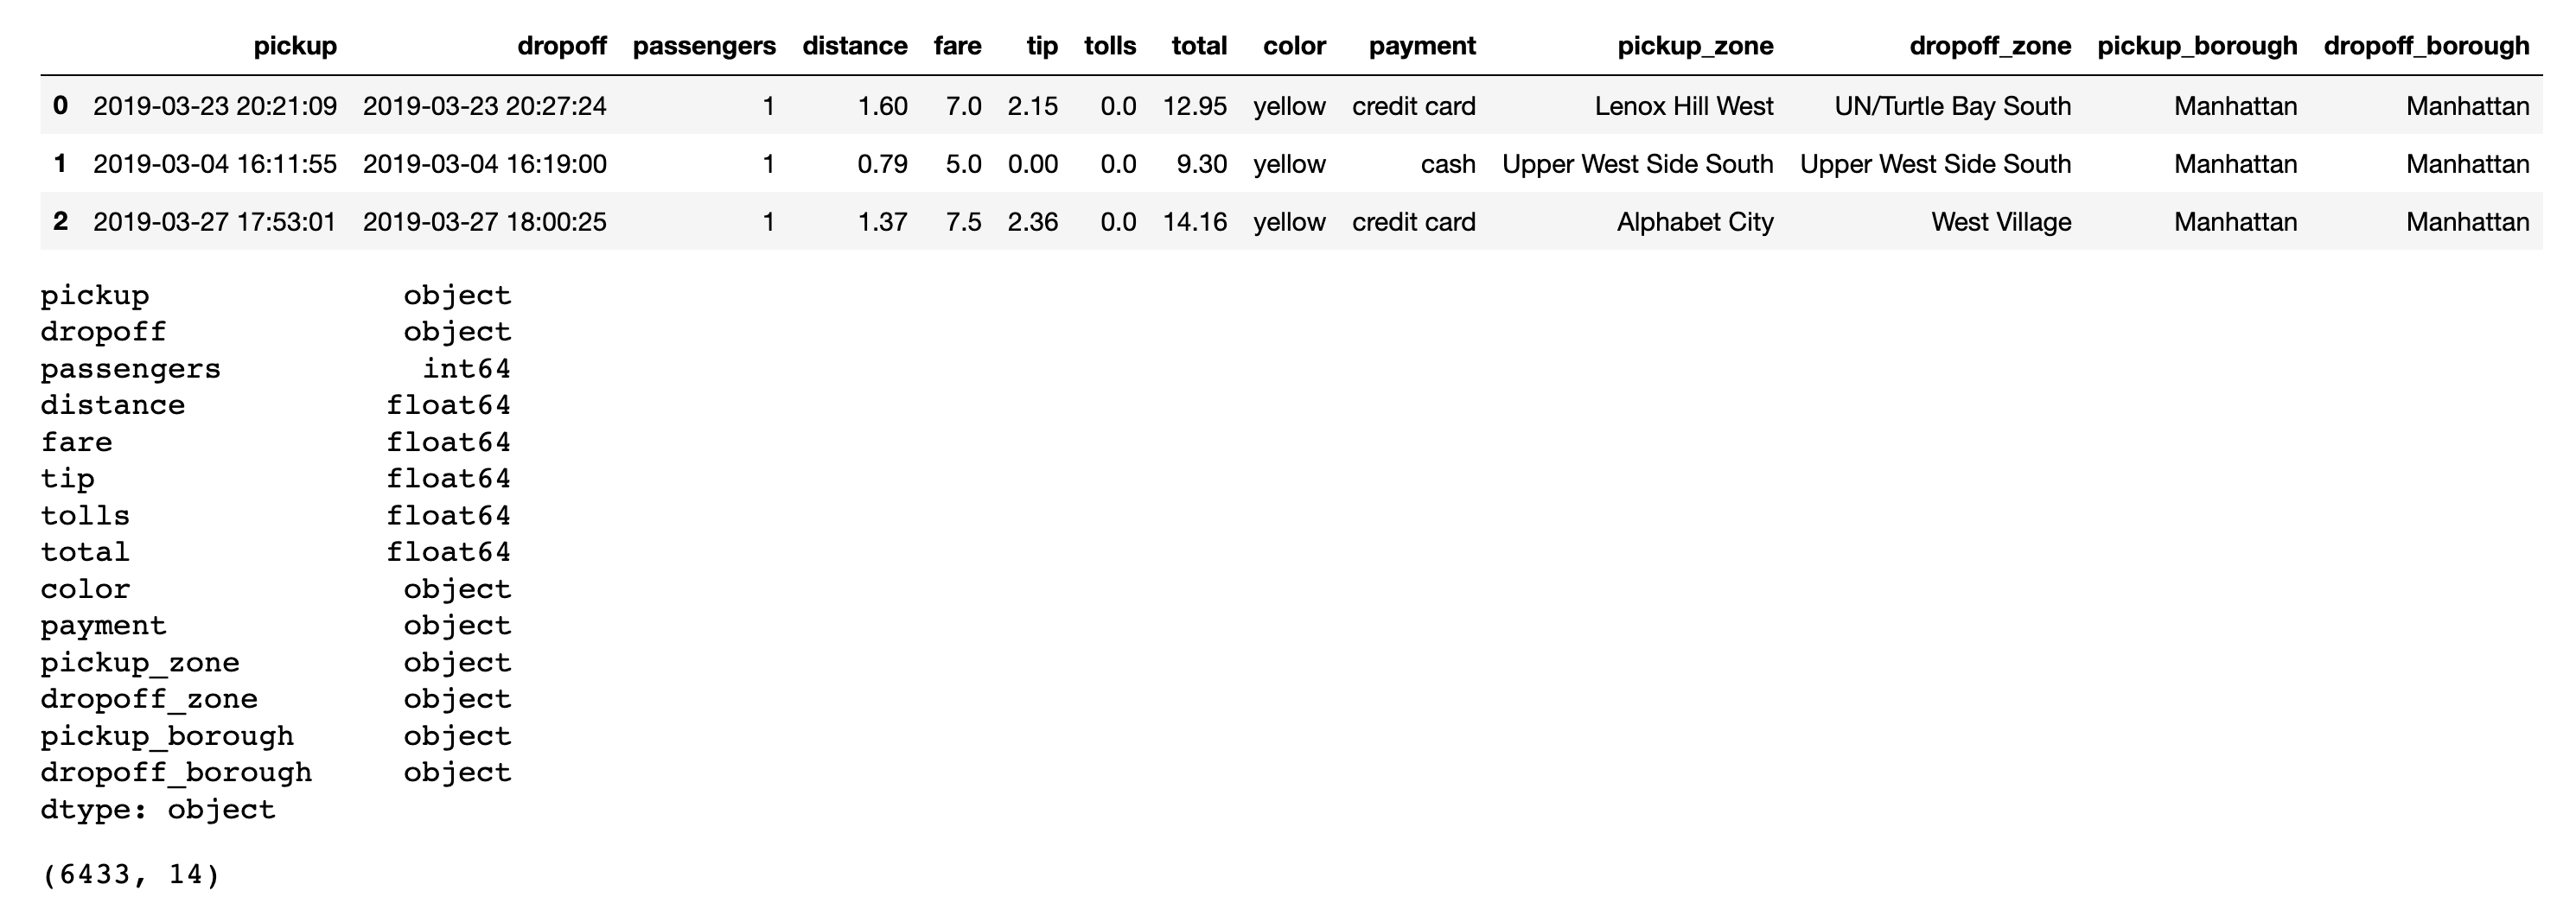

2.Перевіримо, чи є в цьому наборі даних пропущені значення. Для цього можемо вивести кількість пропущених значень в кожній колонці наступним чином (це надзвичайно корисна команда, запамʼятайте її):

In [5]:
df_taxi.isna().sum()

pickup              0
dropoff             0
passengers          0
distance            0
fare                0
tip                 0
tolls               0
total               0
color               0
payment            44
pickup_zone        26
dropoff_zone       45
pickup_borough     26
dropoff_borough    45
dtype: int64

Цікаво, чому дані відсутні? Відповідь на це питання нам дасть розуміння, чи можна такі дані видалити, чи можливо їх треба якось заповнити. Виведіть на екран ті рядки, де колонка, яка має найбільше пропущених значень (або одна з тих, що має максимальну кількість пропущених), має пропущені значення. 
Подивіться на результат і напишіть свої думки щодо питань:
- чому на ваш погляд в цих рядках є відстуні дані в кількох колонках? Чому ви так думаєте?
- чому на ваш погляд є рядки з distance==0, а total!=0? Як ви до цього прйишли?
Відповідь просто текстом. Можна використовувати будь-які допоміжні операції над датасетом чи джерела, які допоможуть вам відповісти на ці питання. Якщо щось використовуєте, то це треба зазначити у відповіді.  

Ваша відповідь тут - це 70% виконання цього завдання.

In [6]:
#  колонка з максимальною кількістю пропущених значень
column_with_max_nulls = df_taxi.isnull().sum().idxmax()

# рядки, де ця колонка має пропущені значення
rows_with_nulls = df_taxi[df_taxi[column_with_max_nulls].isnull()]
print(rows_with_nulls)

                  pickup             dropoff  passengers  distance   fare  \
42   2019-03-30 23:59:14 2019-03-30 23:59:17           1      0.00   80.0   
622  2019-03-12 19:52:36 2019-03-12 19:52:55           3      0.00  120.0   
711  2019-03-21 17:39:50 2019-03-21 18:12:54           2      1.74   17.0   
739  2019-03-14 00:09:17 2019-03-14 00:09:21           1      0.03    2.5   
970  2019-03-29 00:02:00 2019-03-29 00:02:05           2      0.00   45.0   
1108 2019-03-10 09:33:13 2019-03-10 09:52:04           1     13.40   52.0   
1112 2019-03-12 19:09:23 2019-03-12 19:20:46           1      0.90    8.5   
1230 2019-03-29 07:52:46 2019-03-29 08:02:40           1      0.90    5.5   
1690 2019-03-22 06:24:14 2019-03-22 06:24:14           1      0.00   72.0   
1787 2019-03-28 06:58:57 2019-03-28 07:18:10           1      6.32   20.5   
2089 2019-03-12 16:21:28 2019-03-12 16:43:40           1      5.69   21.0   
2137 2019-03-08 13:27:32 2019-03-08 13:46:23           1      1.40   12.0   

In [7]:
# рядки, де distance==0 та total!=0
rows_distance_zero = df_taxi[(df_taxi['distance'] == 0) & (df_taxi['total'] != 0)]
print(rows_distance_zero)


# чому на ваш погляд в цих рядках є відстуні дані в кількох колонках? Чому ви так думаєте?
# відповідь: Дані відсутні в основному в pick up i dropoff zones - може бути що водій вніс дані не вірно
# чому на ваш погляд є рядки з distance==0, а total!=0? Як ви до цього прйишли? Відповідь просто текстом. Можна використовувати будь-які допоміжні операції над датасетом чи джерела, які допоможуть вам відповісти на ці питання. Якщо щось використовуєте, то це треба зазначити у відповіді.
#  відповідь: Перше, що спало на думку це коли таксі підбирає пасажира на вулиці без перед замовлення і вносить дані вручну, тому можливо програма не може зчитати відстань і ставить 0 значення у distance. Total не 0 бо водій може внести ціну поїздки.
# Так само ми можемо побачити що є рядки де pick up i dropoff zone однакові, що свідчить про помилкову одну з адрес і тому значення відстані нульове

                  pickup             dropoff  passengers  distance   fare  \
42   2019-03-30 23:59:14 2019-03-30 23:59:17           1       0.0   80.0   
120  2019-03-21 17:21:44 2019-03-21 17:21:49           1       0.0    2.5   
622  2019-03-12 19:52:36 2019-03-12 19:52:55           3       0.0  120.0   
670  2019-03-08 04:50:48 2019-03-08 04:51:07           1       0.0    2.5   
970  2019-03-29 00:02:00 2019-03-29 00:02:05           2       0.0   45.0   
1080 2019-03-04 14:17:05 2019-03-04 14:17:13           1       0.0    2.5   
1207 2019-03-08 15:41:20 2019-03-08 15:41:23           1       0.0    2.5   
1482 2019-03-10 20:27:25 2019-03-10 20:28:33           1       0.0   52.0   
1690 2019-03-22 06:24:14 2019-03-22 06:24:14           1       0.0   72.0   
1910 2019-03-25 14:37:56 2019-03-25 14:38:22           1       0.0    2.5   
1929 2019-03-13 22:35:35 2019-03-13 22:35:49           1       0.0    2.5   
2398 2019-03-26 21:20:48 2019-03-26 21:29:46           1       0.0    7.5   

3.Заповнимо пусті значення. Оскільки всі колонки набору даних мають пропущені значення в рядках з типом даних рядок, заповнимо пропущені значення рядком `NA`.
Створіть набір даних `df_taxi_clean`, який містить дані `df_taxi` із заповненими пропущеними значеннями у всіх колонках (де ті значення відсутні) значенням `NA`.

**УВАГА!** Надалі в роботі треба використовувати `df_taxi_clean`, ми ж його і створили для того, аби далі ним користуватись :)

In [9]:
df_taxi_clean = df_taxi.fillna('NA')


Після виконання завдання запустіть наступну клітинку:

In [10]:
df_taxi_clean.isna().sum()

pickup             0
dropoff            0
passengers         0
distance           0
fare               0
tip                0
tolls              0
total              0
color              0
payment            0
pickup_zone        0
dropoff_zone       0
pickup_borough     0
dropoff_borough    0
dtype: int64

Очікуваний результат виконання коду в попердній клітинці:

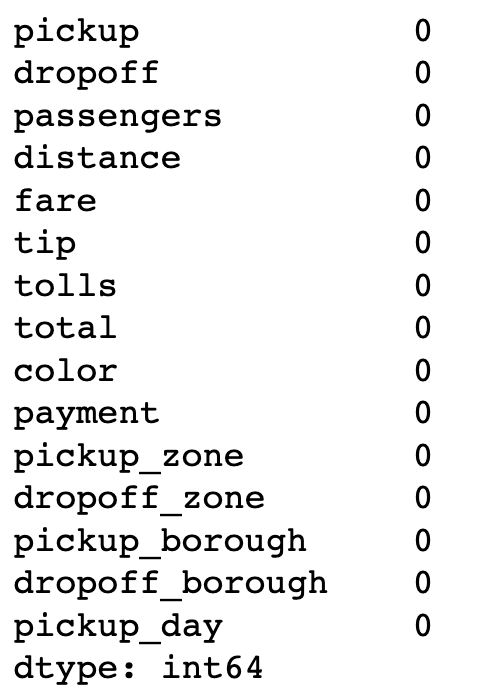

4.Хочеться подивитись на дані у динаміці. Перетворіть колонку `pickup` набору даних `df_taxi_clean` (нам нема чого працювати з "брудними" даними, якщо ми їх вже почистили, але хай будуть в окремій змінній про всяк випадок) у формат `datetime64[ns]`. 
Якщо у Вас при завантаженні набору даних колонка `pickup`- вже в форматі `datetime64[ns]` - можете пропустити це завдання, або спробувати все ж таки написат функцію для трансформації.

Результат перетворення збережіть в тій самій колонці `pickup`.

In [11]:
# Перетворимо колонку pickup у формат datetime64[ns]
df_taxi_clean['pickup'] = pd.to_datetime(df_taxi_clean['pickup'])

print(df_taxi_clean.head())

               pickup             dropoff  passengers  distance  fare   tip  \
0 2019-03-23 20:21:09 2019-03-23 20:27:24           1      1.60   7.0  2.15   
1 2019-03-04 16:11:55 2019-03-04 16:19:00           1      0.79   5.0  0.00   
2 2019-03-27 17:53:01 2019-03-27 18:00:25           1      1.37   7.5  2.36   
3 2019-03-10 01:23:59 2019-03-10 01:49:51           1      7.70  27.0  6.15   
4 2019-03-30 13:27:42 2019-03-30 13:37:14           3      2.16   9.0  1.10   

   tolls  total   color      payment            pickup_zone  \
0    0.0  12.95  yellow  credit card        Lenox Hill West   
1    0.0   9.30  yellow         cash  Upper West Side South   
2    0.0  14.16  yellow  credit card          Alphabet City   
3    0.0  36.95  yellow  credit card              Hudson Sq   
4    0.0  13.40  yellow  credit card           Midtown East   

            dropoff_zone pickup_borough dropoff_borough  
0    UN/Turtle Bay South      Manhattan       Manhattan  
1  Upper West Side South      

In [12]:
df_taxi_clean.dtypes

pickup             datetime64[ns]
dropoff            datetime64[ns]
passengers                  int64
distance                  float64
fare                      float64
tip                       float64
tolls                     float64
total                     float64
color                      object
payment                    object
pickup_zone                object
dropoff_zone               object
pickup_borough             object
dropoff_borough            object
dtype: object

Після виконання завдання запустіть наступну клітинку:

In [13]:
df_taxi_clean.pickup.head(3)

0   2019-03-23 20:21:09
1   2019-03-04 16:11:55
2   2019-03-27 17:53:01
Name: pickup, dtype: datetime64[ns]

Очікуваний результат виконання коду в попердній клітинці:

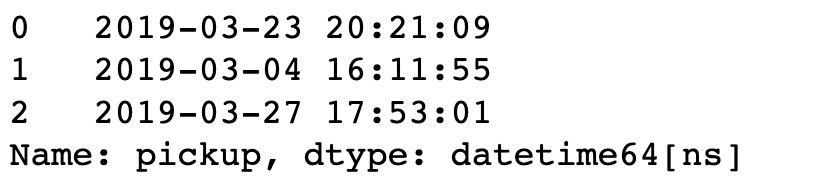

5.У нас колонка pickup зараз мість дані у форматі дата-час. Пропоную прибрати час і зробити аналітику по дням. Для цього виконайте клатинку нижче:

In [14]:
df_taxi_clean['pickup_day'] = df_taxi_clean.pickup.dt.floor('d')

А тепер згрупуйте дані по pickup_day та виведіть графік сумарних платежів по дням. УВАГА! Якщо хочете отримати підписи по осі ОХ як на прикладі, то графік необхідно будувати через `df.plot(...)`. Якщо у Вас будуть інші підписи осі ОХ - це ОК.

Після виведення графіку скажіть, чи бачите щось дивне на ньому? Важливо написати відповідь в цьому завданні словами.

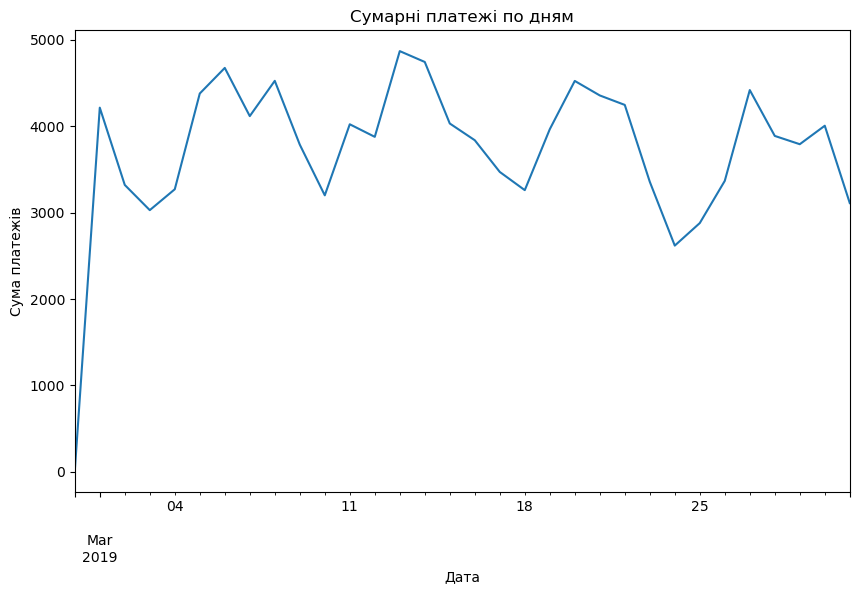

In [15]:
daily_payment = df_taxi_clean.groupby('pickup_day')['total'].sum()

# Побудуємо графік
daily_payment.plot(figsize=(10, 6))
plt.xlabel('Дата')
plt.ylabel('Сума платежів')
plt.title('Сумарні платежі по дням')
plt.show()


Приклад очікуваного графіку:

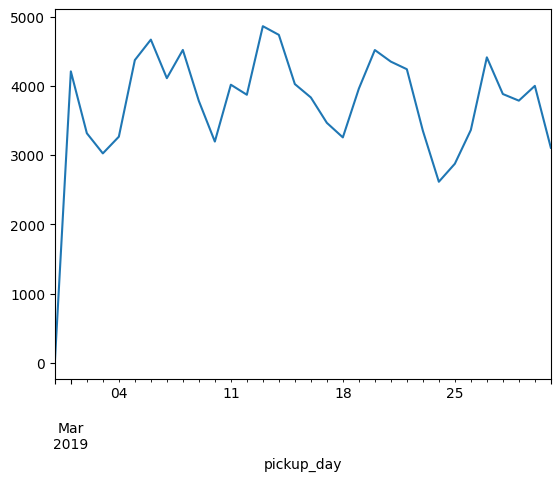

6.Виведіть кількість рядків для кожного pickup_day.

In [16]:
counts_row_for_each_pickup_day = df_taxi_clean['pickup_day'].value_counts()
counts_row_for_each_pickup_day

pickup_day
2019-03-14    260
2019-03-06    257
2019-03-13    244
2019-03-01    241
2019-03-08    235
2019-03-20    233
2019-03-27    232
2019-03-22    229
2019-03-05    228
2019-03-21    221
2019-03-16    220
2019-03-12    218
2019-03-07    218
2019-03-30    215
2019-03-11    209
2019-03-29    209
2019-03-23    209
2019-03-28    205
2019-03-09    204
2019-03-15    201
2019-03-19    201
2019-03-02    198
2019-03-31    187
2019-03-10    185
2019-03-17    178
2019-03-26    178
2019-03-18    173
2019-03-04    171
2019-03-03    169
2019-03-25    155
2019-03-24    149
2019-02-28      1
Name: count, dtype: int64

Маєте побачити, що для дати 2019-02-28 є тільки один рядок. Це запис, який, схоже, потрапив сюди випадково, видаліть з набору даних df_taxi_clean рядок, що містить pickup_day рівний 2019-02-28. Та знову виведіть графік сумарних платежів по pickup_day.

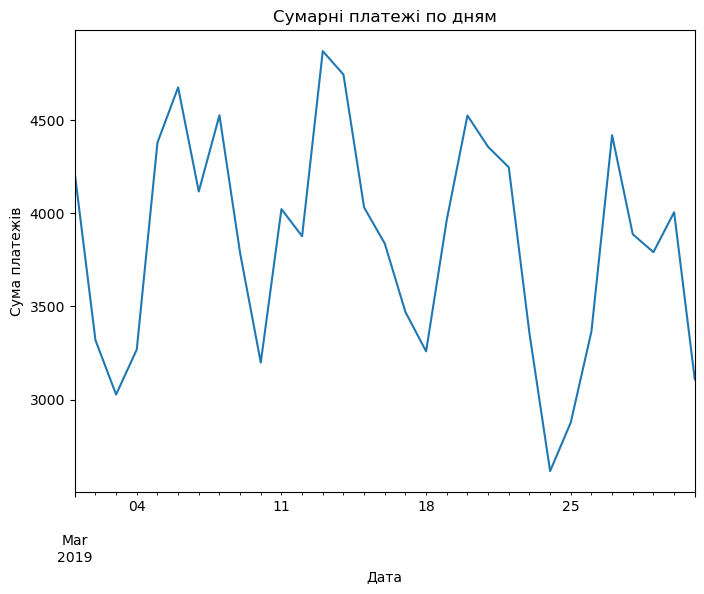

In [17]:
df_taxi_clean = df_taxi_clean[df_taxi_clean['pickup_day'] != '2019-02-28']
df_taxi_clean
daily_payment = df_taxi_clean.groupby('pickup_day')['total'].sum()
# Побудуємо графік
daily_payment.plot(figsize=(8, 6))
plt.xlabel('Дата')
plt.ylabel('Сума платежів')
plt.title('Сумарні платежі по дням')
plt.show()

Очікуваний графік:

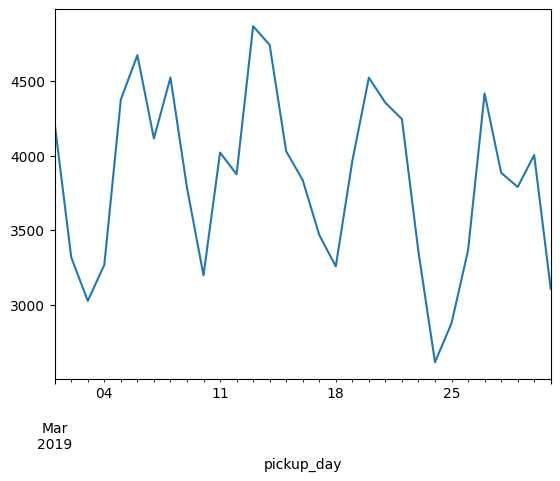

7.Давайте подивимось на динаміку сумарних платежів по районам. Для цього сформуйте на основі `df_taxi_clean` зводну таблицю, де рядками є `pickup_day`, колонками `pickup_borough`, а значенням - сума платежів. Запишіть зводну таблицю в змінну `borough_pivot`. Наостанок, вилучіть колонку зі значенням `pickup_borough` рівним `NA` - уявімо, що ці дані нас не цікавлять.

In [20]:
borough_pivot = pd.pivot_table(df_taxi_clean, index='pickup_day', columns='pickup_borough', values='total', aggfunc='sum')
borough_pivot = borough_pivot.drop(columns=['NA'], errors='ignore')

print(borough_pivot)

pickup_borough   Bronx  Brooklyn  Manhattan  Queens
pickup_day                                         
2019-03-01      123.42    353.05    3169.47  553.29
2019-03-02         NaN    146.56    2716.33  456.13
2019-03-03       80.75    407.06    2100.23  428.73
2019-03-04       92.00    188.73    2026.17  962.18
2019-03-05       98.16    558.40    2981.26  739.56
2019-03-06      130.65    198.53    3501.07  833.36
2019-03-07         NaN    440.75    3087.82  587.13
2019-03-08       79.20    237.47    3408.85  780.34
2019-03-09       80.22    187.88    2967.71  511.73
2019-03-10      119.86    160.48    2353.45  494.64
2019-03-11       46.04    254.92    3019.49  697.51
2019-03-12       31.83    158.74    2896.13  623.10
2019-03-13       42.44    287.68    3690.66  837.28
2019-03-14       82.53    255.84    3609.49  794.69
2019-03-15       94.32    336.91    3051.71  516.99
2019-03-16       34.80    334.22    2763.89  703.67
2019-03-17       64.63    166.92    2430.99  806.96
2019-03-18  

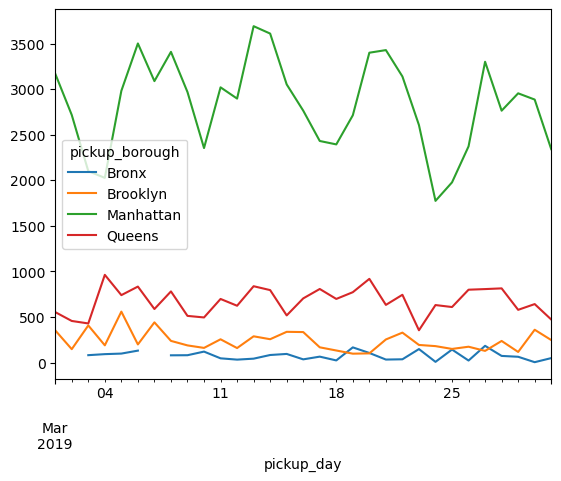

In [21]:
borough_pivot.plot();

Далі запустіть наступну клітинку та дайте відповідь на питання, в якому районі найчастіше найбільша сума денних платежів за поїздки на таксі?   
До речі, також рекомендую спробувати запустити команду `borough_pivot.plot()` та зрозуміти, навіщо нам тут частина `fillna(0)`.

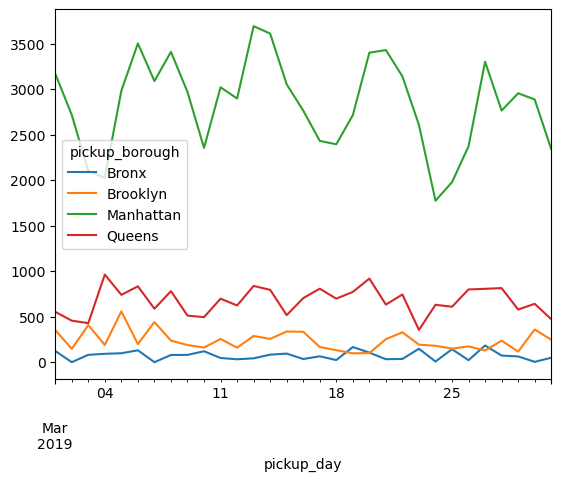

In [22]:
borough_pivot.fillna(0).plot();
#  найчастіше найбільша сума денних платежів за поїздки на таксі на Манхетені

Очікуваний графік :

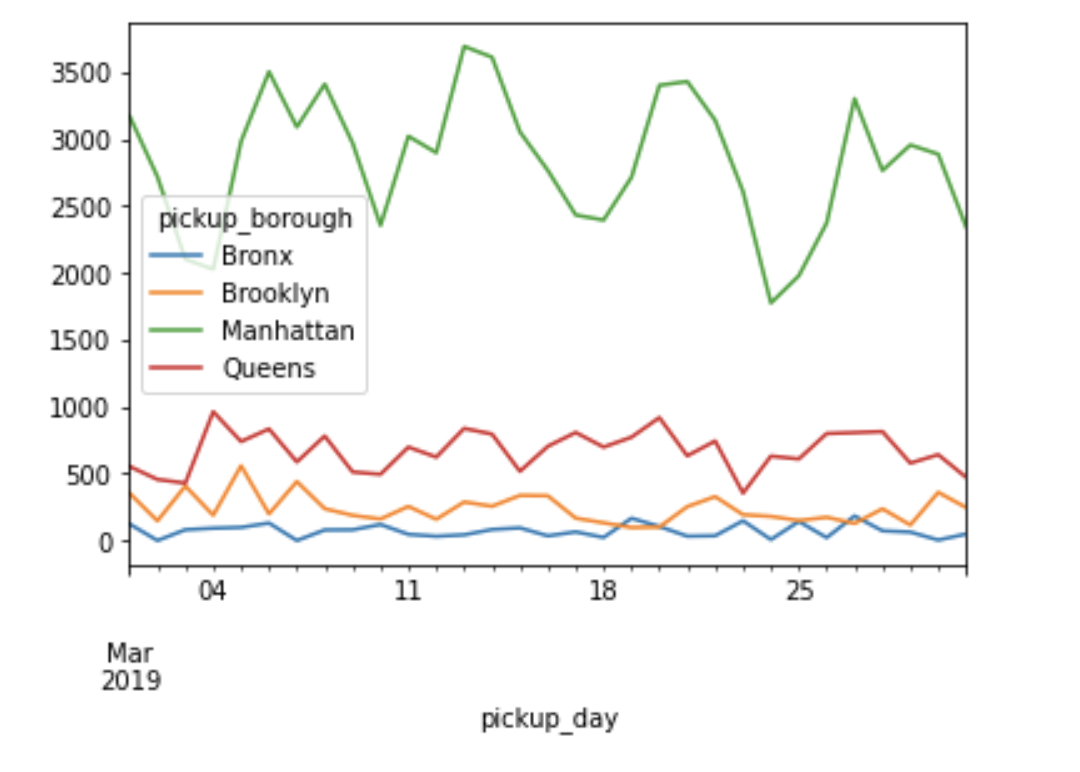

8.Виведіть будь-яким способом гістограми суми денних платежів за поїздки по кожному з районів. Має бути 4 гістограми, на 4ох різних фігурах, або на одній.   

`Підказка:` Найпростіше це буде зробити, використавши `borough_pivot` та побудову графіку через `<назва датафрейму>.<назва графіку>()` - тобто методом датафрейму з пандаса. Але графік можна побудувати також використовуючи цикл. Для тих, хто хоче потренуватись, рекомендую зробити обома способами.

Пограйтесь з кількістю бінів. Яка кількість бінів на ваш погляд тут є вдалою? Чому?

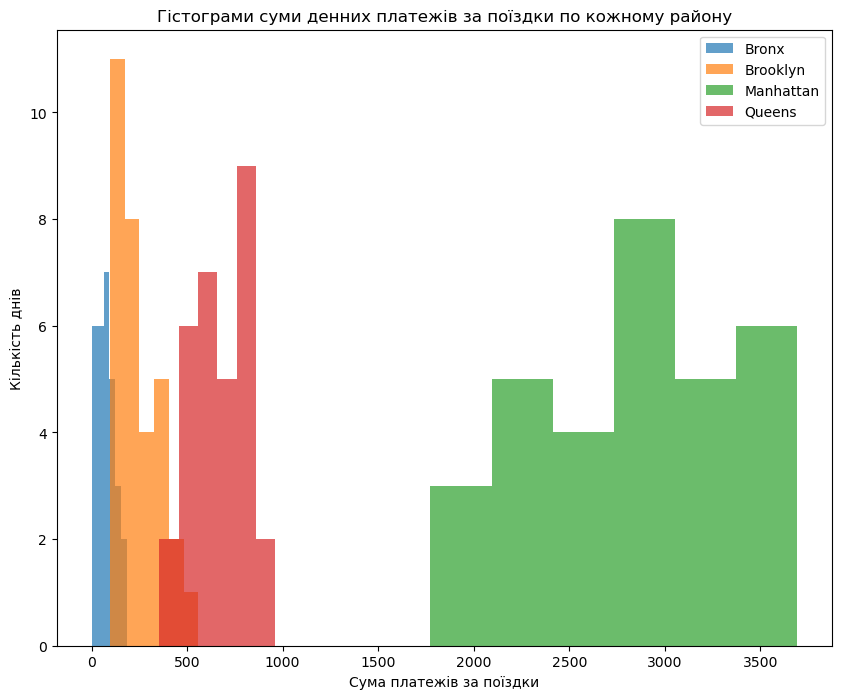

In [23]:
plt.figure(figsize=(10, 8))

for borough in borough_pivot.columns:
    plt.hist(borough_pivot[borough], bins=6, alpha=0.7, label=borough)

plt.xlabel('Сума платежів за поїздки')
plt.ylabel('Кількість днів')
plt.title('Гістограми суми денних платежів за поїздки по кожному району')
plt.legend()
plt.show()

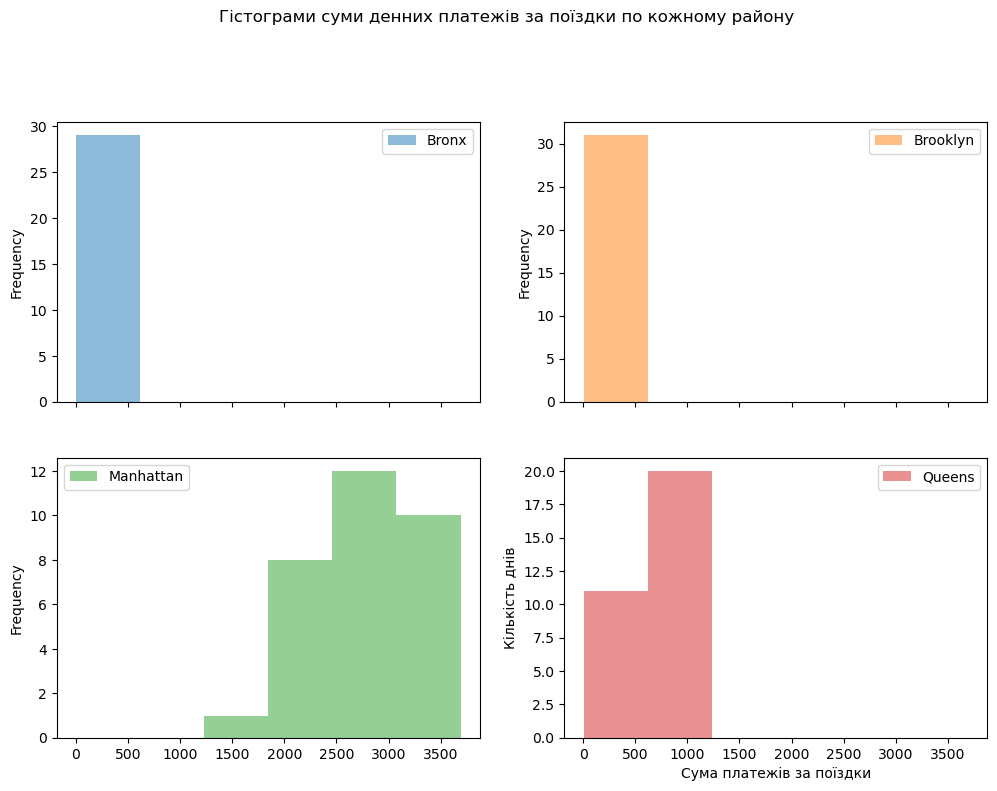

In [24]:
# Побудуємо графіки гістограм для суми денних платежів за поїздки по кожному району
borough_pivot.plot(kind='hist', bins=6, alpha=0.5, figsize=(12, 8), subplots=True, layout=(2, 2), legend=True)

# Налаштуємо лейбли та заголовок
plt.suptitle('Гістограми суми денних платежів за поїздки по кожному району', y=1.02)
plt.xlabel('Сума платежів за поїздки')
plt.ylabel('Кількість днів')

plt.show()

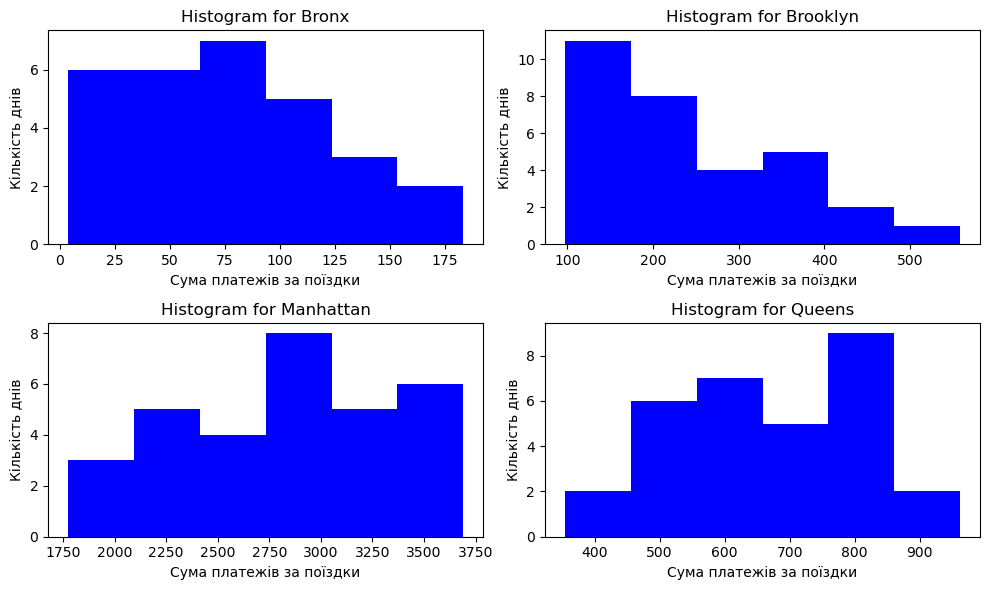

In [25]:
# Побудуємо 4 гістограми на окремих фігурах
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 6))

# Отримаємо список унікальних районів
boroughs = list(borough_pivot.columns)

# Побудуємо гістограми для кожного району
for i, ax in enumerate(axes.flat):
    borough = boroughs[i]
    ax.hist(borough_pivot[borough], bins=6, color='blue')
    ax.set_title(f'Histogram for {borough}')
    ax.set_xlabel('Сума платежів за поїздки')
    ax.set_ylabel('Кількість днів')

plt.tight_layout()
plt.show()

Приклад одного з правильних виконань завдання:

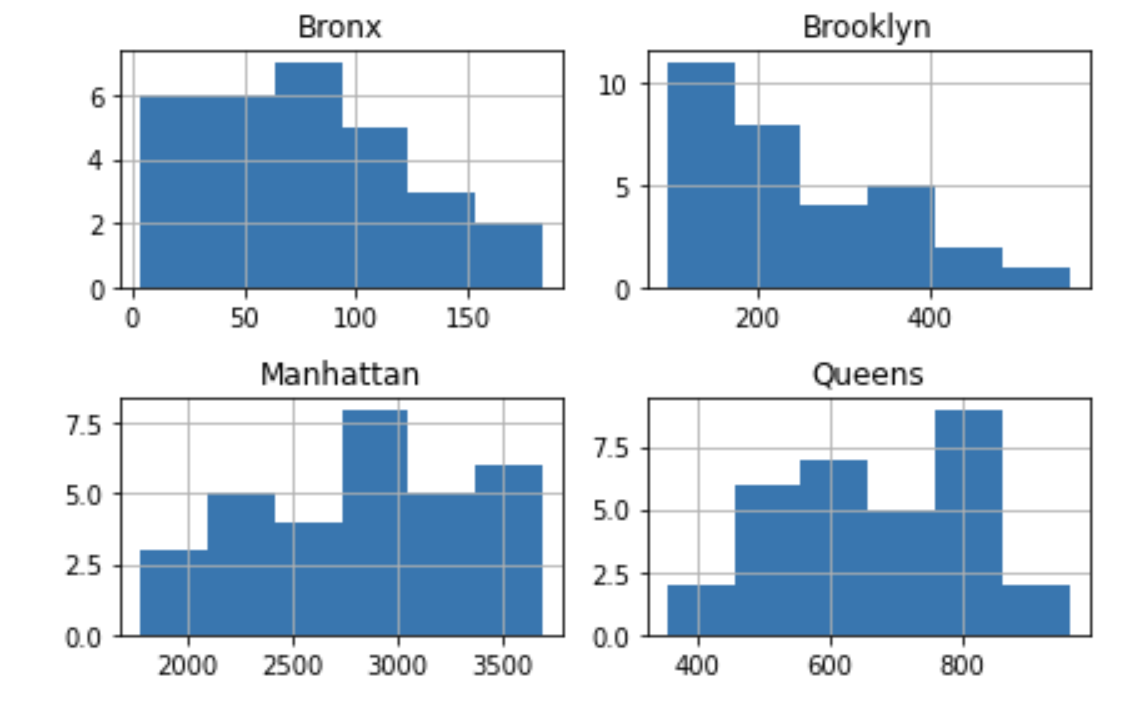

9.Бачимо, що на окремих гістограмах у нас різні діапазони чеків. Припустимо, нам хочеться порівняти розподіли денних сум платежів по райнам. Давайте для цього виведемо 4 гістограми на одній фігурі. Вони звісно ж мають бути різного кольору і напівпрозорими для комфортного перегляду. Створіть гістограму максимально близьку до тої, що надана в очікуваному результаті.
`Підказка:` ця візуалізація створена з допомогою pandas plotting.

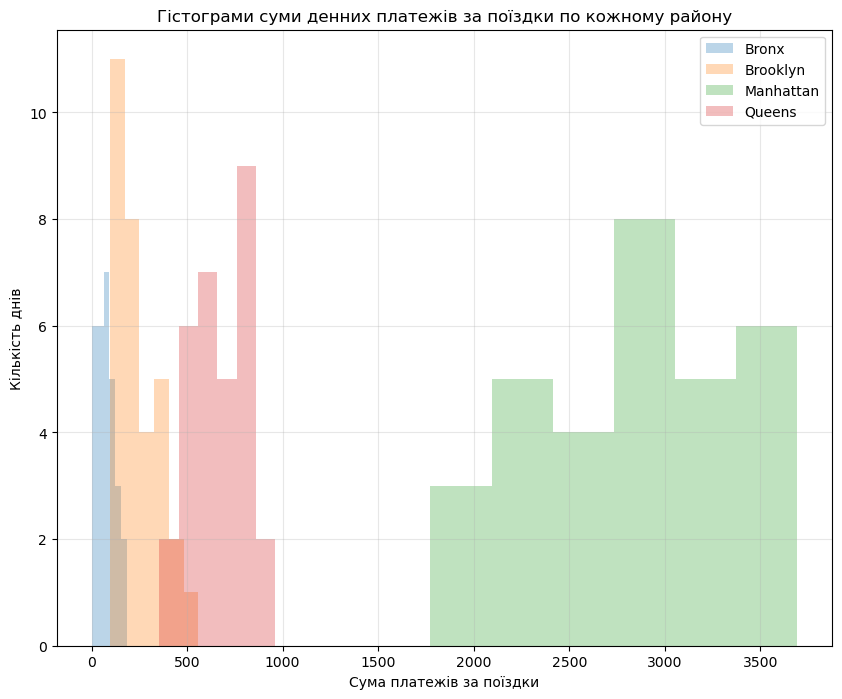

In [26]:
plt.figure(figsize=(10, 8))

for borough in borough_pivot.columns:
    plt.hist(borough_pivot[borough], bins=6, alpha=.3, label=borough)
    plt.grid(axis='both',alpha =.3)

plt.xlabel('Сума платежів за поїздки')
plt.ylabel('Кількість днів')
plt.title('Гістограми суми денних платежів за поїздки по кожному району')
plt.legend()
plt.show()

Очікуваний результат:

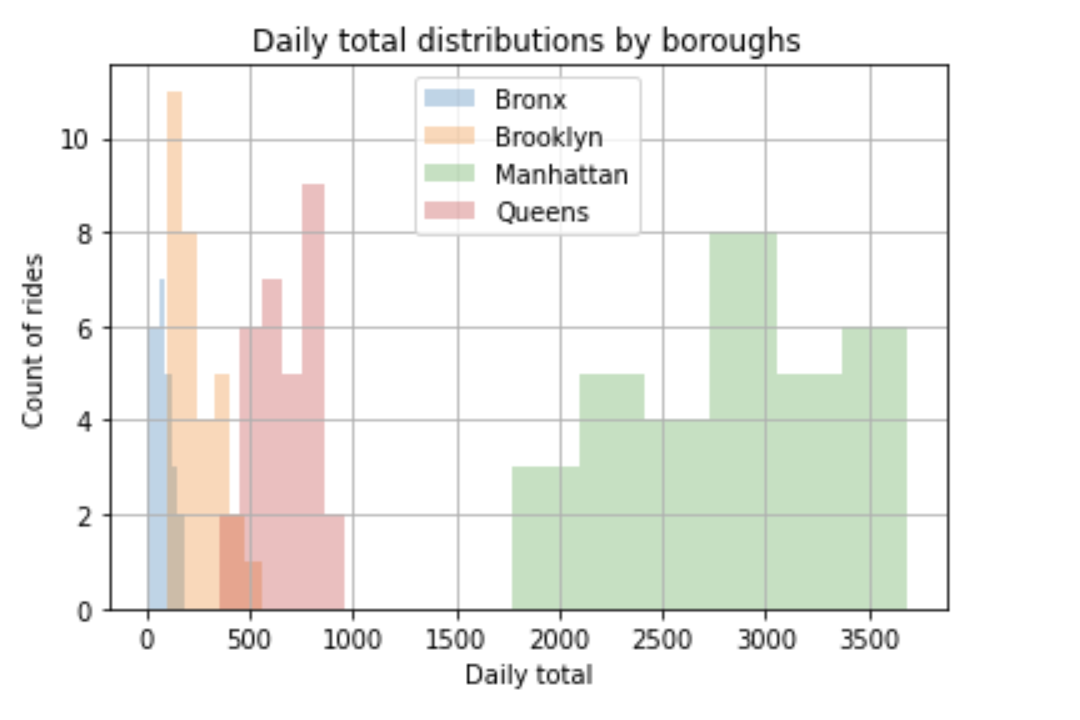

А ось приклад, як можна було сформувати щось подібне з допомогою функціоналу seaborn. Як на мене візуалізація за замовчанням не є зручною для розуміння.  

`Опціональне завдання`: Пограйтесь з налаштуваннями і пошукайте варіант, за якого візуалізація розподілу суми денних платежів через seaborn є на ваш погляд зручною для аналізу.

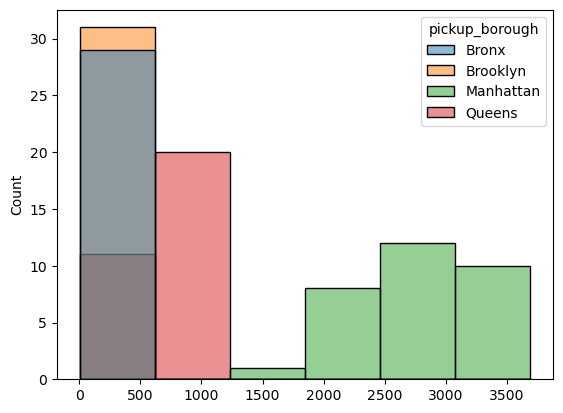

In [27]:
sns.histplot(data=borough_pivot, bins=6);

10.З допомогою seaborn виведіть гістограми суми щомісячних платежів по кольорам автомобілів (колонка `color`). На одній фігурі має бути кількість гістограм рівна кількості різних кольорів автомобілів в наборі даних. Встановіть розмір фігури (10,5) та знайдіть значення dots-per-inch для фігури за якого якість зображення буде хорошою (зображення не буде розмитим).
`Підказки:` 
1. побудувати візуалізацію можна в один рядок коду, і ще один рядок - для встановлення розмірів і роздільної здатності фігури. 
2. для зміни порядку відображення гістограм кольорів автомобілів (аби менша гістограма була перед, а не за більшою) можна посортувати датафрейм за полем кольору так, аби отримати той порядок, який вам потрібен. 

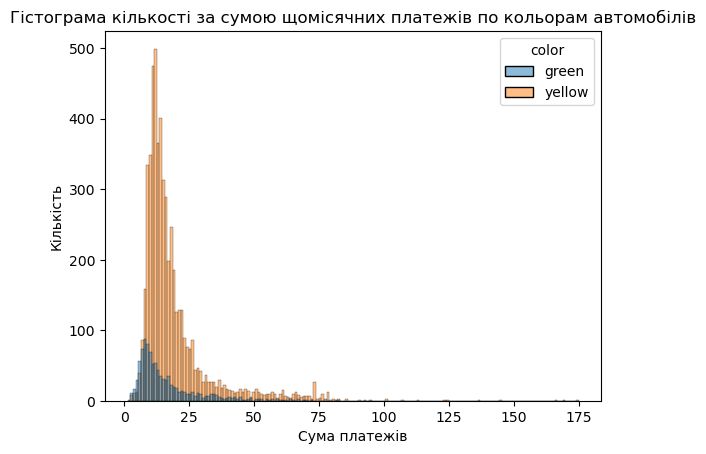

In [28]:
color_counts = df_taxi_clean.groupby('color').size()
sorted_df = df_taxi_clean.sort_values(by='color')

sns.histplot(x='total', hue='color', data=sorted_df)

plt.title('Гістограма кількості за сумою щомісячних платежів по кольорам автомобілів')
plt.xlabel('Сума платежів')
plt.ylabel('Кількість')

plt.show()

Очікуваний результат:

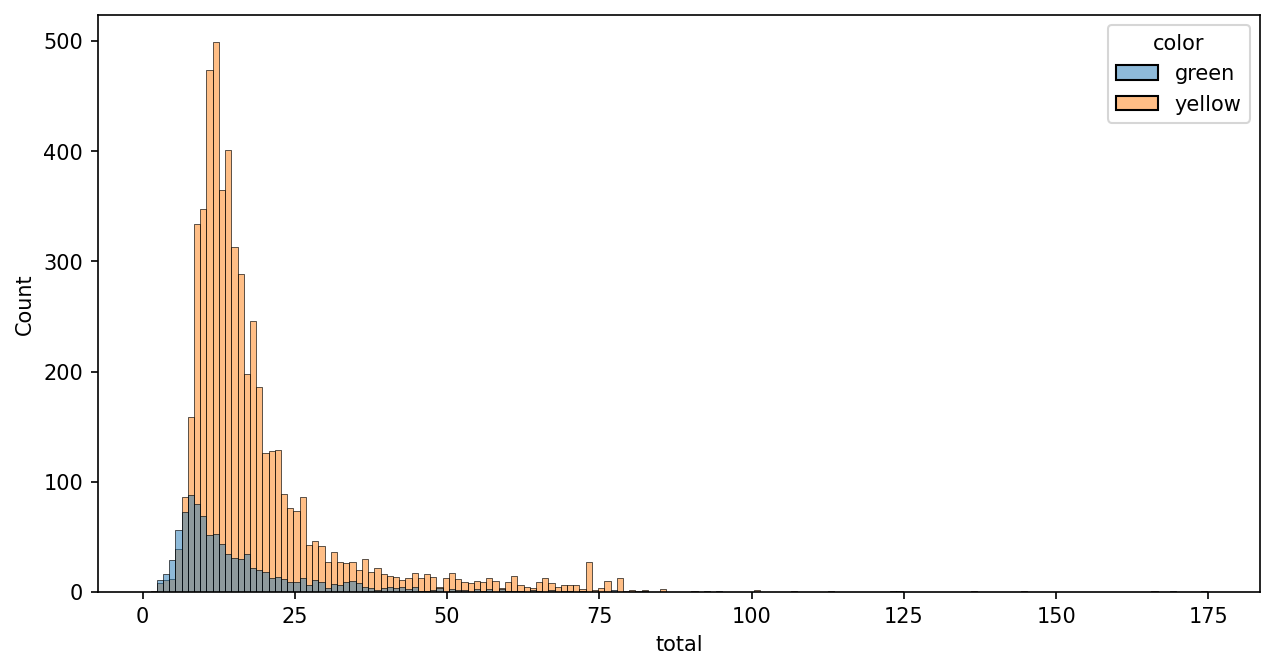

11.Цікаво, а чи є залежність між дальністю поїздки і розміром чайових? Побудуйте діаграму розсіювання між дальністю поїздки і розміром чайових. Можна побудувати графік будь-яким методом, який вам до вподоби, чи хочеться потренувати. 

В очікуваному результаті я надаю графік, який би будувала я. На наведеному прикладі найскладніша частина - це зробити червоною цю лінію тренду (вона побудована з допомогою спеціального типу графіку в seaborn). Аби вказати колір лінії в тому типу графіку треба зазначити в параметрі `line_kws`, що ми хочемо лінію червоного кольору. Але якщо у вас не буде виходити лінія червоного кольору - нехай буде синього - це не критично :) 

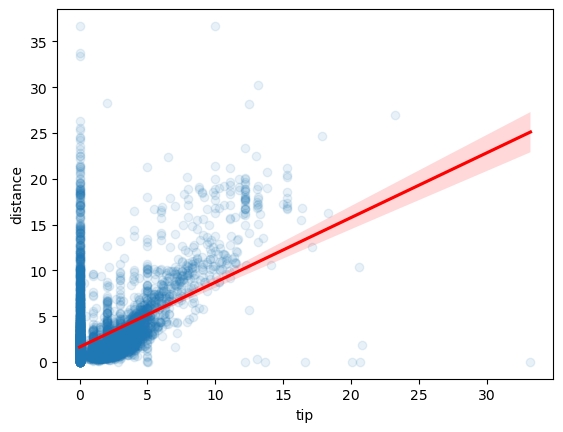

In [29]:
sns.regplot(x='tip', y='distance', data=df_taxi_clean, scatter_kws={'alpha':0.1}, line_kws={'color':'red'});


Один з можливих результатів (побудовано з seaborn):

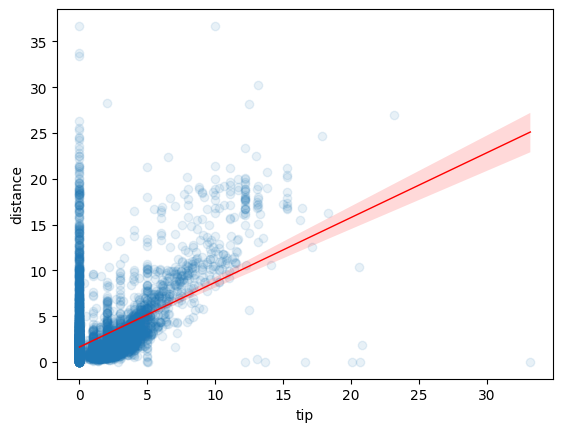

12.Дайте відповідь на питання: що означає пряма лінія з точок, паралельна осі, за якою розташована дальність поїздки?

In [192]:
# Відповідь: Оскільки лінія тренду напрявлена вгору- тренд позитивний, бо ми бачимоб що зі збільшенням відстані поїздки - збільшується і розмір чайових. 

13.Побудуйте поденну динаміку чайових по районам, в яких забрали пасажира. Можна побудувати графік будь-яким методом, який вам до вподоби, чи хочеться потренувати. Важливо, щоб на одному графіку було 4 лінії (всі райони, крім `NA`), які відображають динаміку чайових, була легенда і були підписи вісей. В очікуваному результаті я надаю графік, який би будувала я. 

Дайте відповіді на питання:
- при початку поїздки в якому районі **найнижчий середній розмір** чайових?
- а в поїздках з якого району **найвищий середній розмір** чайових? 
- при проїздках з його району розмір чайових найстабільніший (найменше змінюється з дня у день)?

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 1000x1200 with 0 Axes>

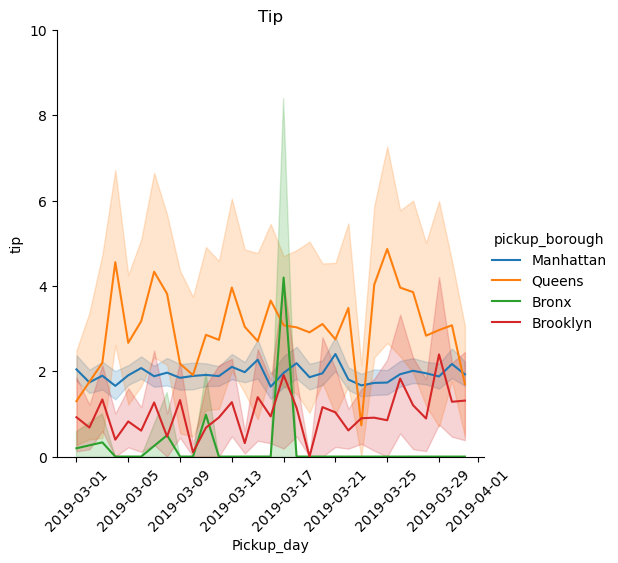

In [46]:
df_taxi_filtered = df_taxi_clean[df_taxi_clean.pickup_borough!='NA']
# df_taxi_filtered = df_taxi_clean.drop(columns=['NA'], errors='ignore')


plt.figure(figsize=(10, 12))

sns.relplot(x='pickup_day', y='tip', hue='pickup_borough', kind='line', data=df_taxi_filtered);

plt.ylim(0, 10)

plt.title('Tip')
plt.xlabel('Pickup_day')
plt.xticks(rotation=45)

plt.show()

# Дайте відповіді на питання:

# при початку поїздки в якому районі найнижчий середній розмір чайових? - Bronx - має найнижчий розмір чайових
# а в поїздках з якого району найвищий середній розмір чайових? - Queens має найвищий середній розмір чайових
# при проїздках з його району розмір чайових найстабільніший (найменше змінюється з дня у день)? - Manhattan

Один з можливих результатів (побудовано з seaborn):

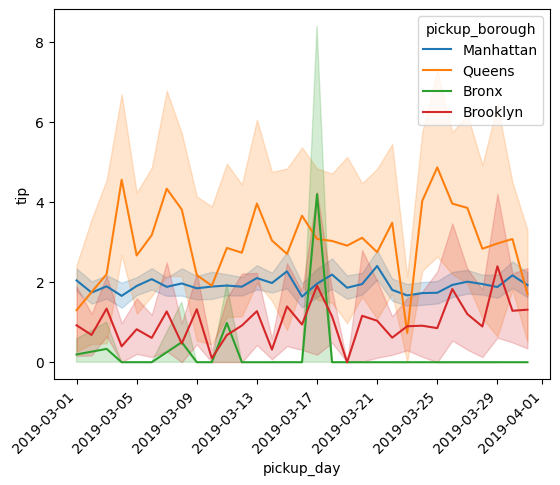

14.Побудуйте box-plot розміру чайових по району (всі райони, крім `NA`) старту поїздки. Можна побудувати графік будь-яким методом, який вам до вподоби, чи хочеться потренувати. 

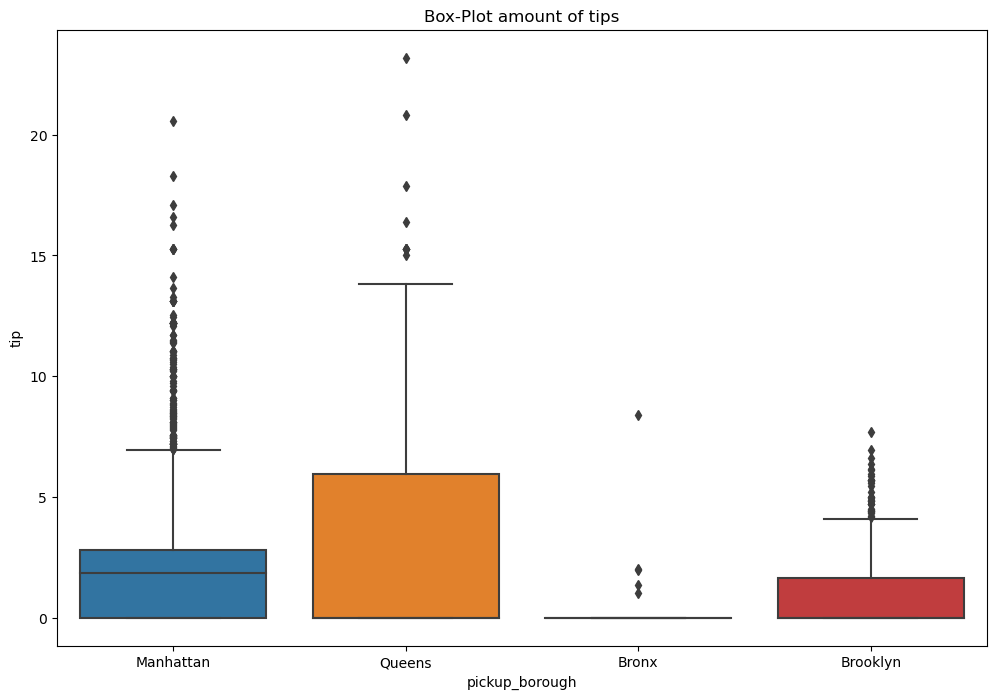

In [47]:
df_selected = df_taxi_clean[df_taxi_clean.pickup_borough!='NA']

plt.figure(figsize=(12, 8))
sns.boxplot(x='pickup_borough', y='tip', data=df_selected)


plt.title('Box-Plot amount of tips')
plt.xlabel('pickup_borough')
plt.ylabel('tip')

plt.show()


Один з можливих результатів (побудовано з seaborn):

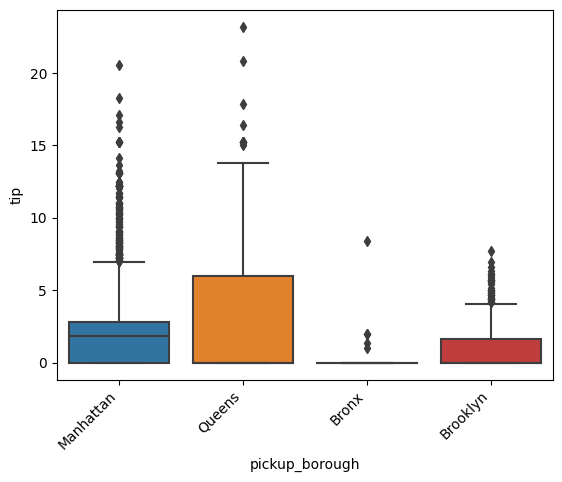

15.Творче завдання. Створіть ТРИ інформативних візуалізації, які б допомогли в аналізі цих даних.   

Що вам було б цікаво дізнатись про ці поїздки? Як це можна було б використати при прийнятті рішень бізнесом? 
Наприклад, якщо найбільше поїздок в певний час доби, значить, треба стимулювати водіїв працювати в ці години. Якщо найбільше поїздок з певного району - треба тримати там запас авто, які б могли взяти пасажирів і т.д.
Не обмежуйте свою фантазію. 

Візуалізації мають бути не тими, на які ми вже побудували вище. Але можна створювати аналогічні, просто з використанням інших полів даних. І описати, що ви бачите з тих візуалізацій.
Кожна візуалізація оцінюється як 1 завдання. Без виконання цього завдання ДЗ не приймається. Якщо є питання щодо виконання - пишіть у чат.

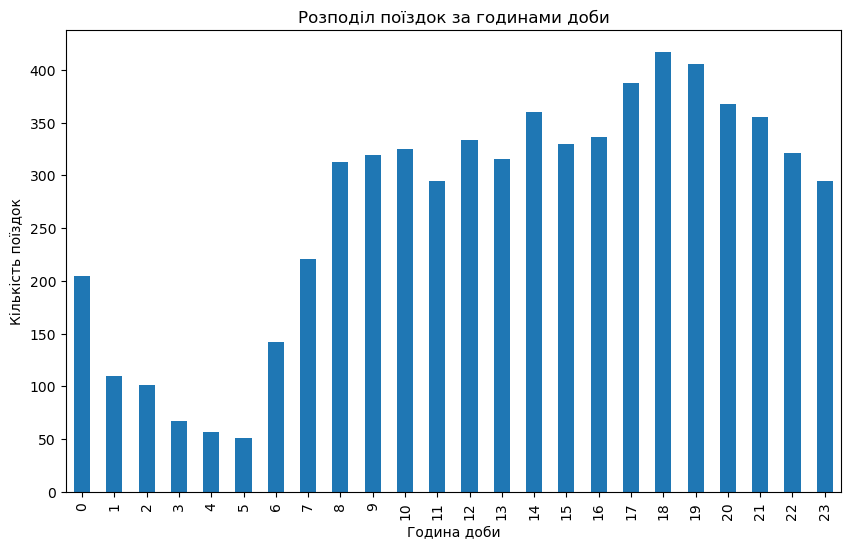

In [39]:
# 1. Як розподілені поїздки за часом доби?
# Це може допомогти зрозуміти, коли найбільше попиту на таксі і як можна оптимізувати доступність транспорту.

df_taxi_clean['pickup'] = pd.to_datetime(df_taxi_clean['pickup'])
df_taxi_clean['hour'] = df_taxi_clean['pickup'].dt.hour

df_taxi_clean.groupby('hour').size().plot(kind='bar', figsize=(10, 6))
plt.title('Розподіл поїздок за годинами доби')
plt.xlabel('Година доби')
plt.ylabel('Кількість поїздок')
plt.show()

# Найбільшу к-сть поїздок ми бачимо з 17 до 21 години, в цей час може бути потрібна більша к-сть доступних машин для замовлення


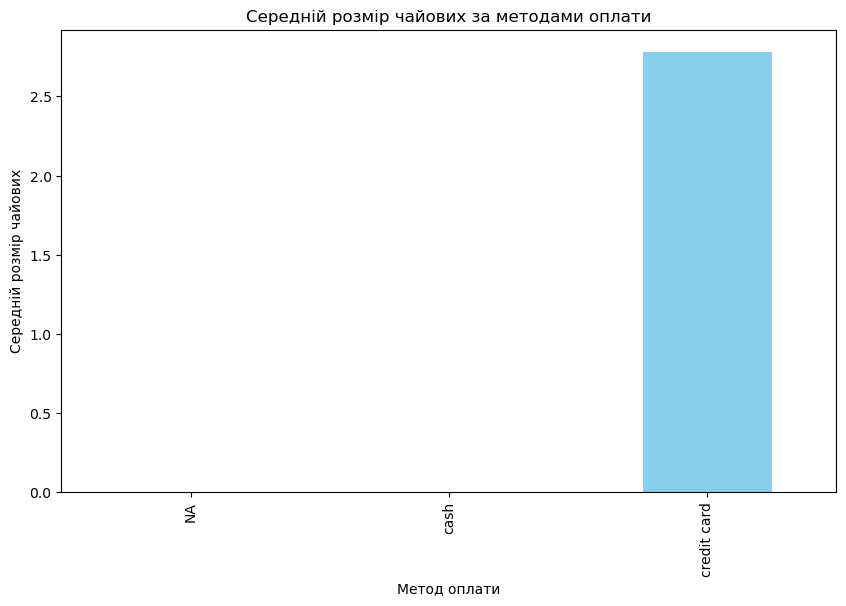

In [40]:
# 2.Чи залежить середній розмір чайових від різних методів оплати.
# В даному випадку ми бачимо, що всі використовують оплату кредитною картою тому залежності немає


df_taxi_clean.groupby('payment')['tip'].mean().plot(kind='bar', color='skyblue', figsize=(10, 6))
plt.title('Середній розмір чайових за методами оплати')
plt.xlabel('Метод оплати')
plt.ylabel('Середній розмір чайових')
plt.show()

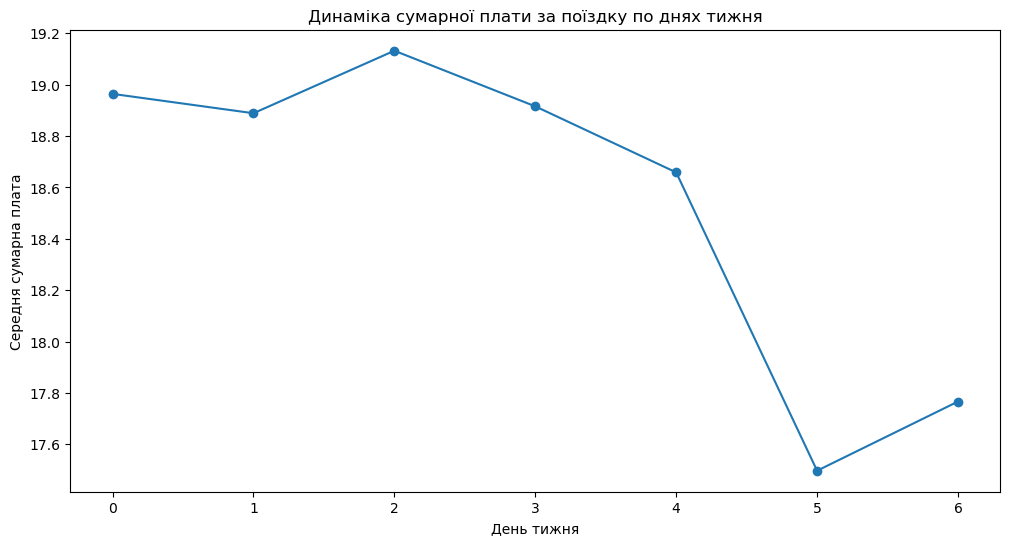

In [42]:
# 3.Cумарна оплата за поїздку по днях тижня:
# Можемо дізнатись, як змінюється сумарна плата за поїздку в різні дні тижня. В даному випадку ми бачимо, що найбільше оплат у будні дні, у вихідні замовлень менше

df_taxi_clean['day_of_week'] = df_taxi_clean['pickup'].dt.dayofweek
df_taxi_clean.groupby('day_of_week')['total'].mean().plot(kind='line', marker='o', figsize=(12, 6));
plt.title('Динаміка сумарної плати за поїздку по днях тижня')
plt.xlabel('День тижня')
plt.ylabel('Середня сумарна плата')
plt.show()